In [21]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import json
import plotly.express as px
import ast

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**CS-401 Applied Data Analysis**  
**Project Milestone 3** 

**Group ID:** TheSuricates  

# **Budget Battles:** Maximizing Returns in Filmmaking Odyssey

The film industry is a growing industry of $42.2 billion in 2019 in theatrical box office alone. Including home entertainment, it reached $139 billion in 2018. However, a big budget doesn't always mean an important return on investment (ROI). In 2002, the film The Adventures of Pluto Nash cost $100 million to produce but generated only $7 million. This example shows that a high budget is not always synonymous with a profitable return. On the contrary, the movie Paranormal activity had a budget of $200K and a box office of over $190 million. Is it easier to multiply the revenue from a high or low budget movie?

That's what two producer friends with very different wallets ask themselves over a drink. "I bet I can multiply my investment a lot more than you can with my big-budget film!". "We'll see about that!" replies the other with modesty. Let's follow these two friends on their exciting adventure and see what we can do to help! This story will take us to the core of the movie industry by exploring interesting parameters of the TMDb dataset.

We will determine which movie features have a significant impact on the ROI, and then find the best strategy to maximize it, for both high and low budget producers. Which producer will win the bet?

## Let's take a look at the data!

which plots ?
- movie budget with low / high budget
- multiplier / each feature
- histogram multiplier vs high/low

In [38]:
df = pd.read_csv('./data/movie_features.csv')

# get number of rows in df
number_of_rows = df.shape[0]
print(number_of_rows)

# number in category low budget
low_budget = df[df['category'] == 'low'].shape[0]
print(low_budget)

# number in category high budget
medium_budget = df[df['category'] == 'high'].shape[0]
print(medium_budget)



1701
855
846


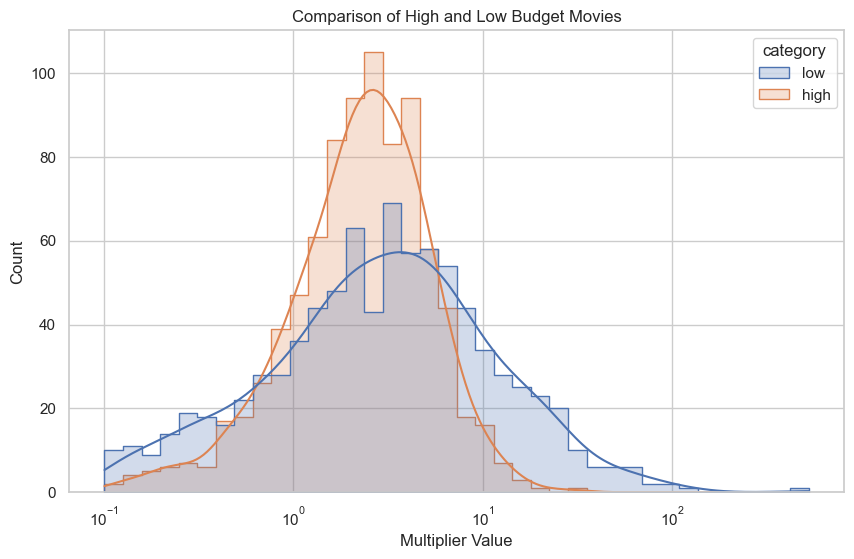

In [43]:
import plotly.tools as tls

sns.set(style="whitegrid")

# Create a figure and axis object
plt.figure(figsize=(10, 6))

# Create the histogram plot with Seaborn
# 'hue' is used to color the bars based on the 'category'
# 'element="step"' is used to create a step plot that resembles the overlay mode in Plotly
sns.histplot(data=df, x="multiplier", hue="category", element="step", log_scale=(True, False), kde = True)



# Export Plotly object to HTML file



# Set the title and labels
plt.title("Comparison of High and Low Budget Movies")
plt.xlabel("Multiplier Value")
plt.ylabel("Count")

# Create a custom legend
# legend_labels = ['High budget', '', "High budget", ""]
# plt.legend(title='Category', loc='upper right', labels=legend_labels)

# Show the plot
plt.show()




In [40]:
import plotly.subplots as sp
# Filter the DataFrame to include only 'high' category
df_high_budget = df_test[df_test['category'] == 'high']

# Filter the DataFrame to include only 'low' category
df_low_budget = df_test[df_test['category'] == 'low']

# Create a pie chart for 'high' category
fig_high = px.pie(df_high_budget, names='genres', title='Genre distribution for high budget movies')

# Create a pie chart for 'low' category
fig_low = px.pie(df_low_budget, names='genres', title='Genre distribution for low budget movies')

# Create a subplot with 1 row and 2 columns and specify the subplot type as 'domain'
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=['High Budget', 'Low Budget'], specs=[[{'type': 'domain'}, {'type': 'domain'}]])

# Add the 'high' pie chart to the first column of the subplot
fig.add_trace(fig_high['data'][0], row=1, col=1)

# Add the 'low' pie chart to the second column of the subplot
fig.add_trace(fig_low['data'][0], row=1, col=2)


# Add a title to the entire subplot
fig.update_layout(title_text="Distribution of genre for high and low budget")

fig.show()

fig.write_html("./plots_html/pie_genre.html",include_plotlyjs = False)

In [36]:
# Group by 'category' and 'genres' and calculate the mean of 'multiplier'
df_avg_multiplier_per_genre_and_budget = df_test.groupby(['category', 'genres'])['multiplier'].mean().reset_index()

# Create a bar chart
fig = px.bar(df_avg_multiplier_per_genre_and_budget, x='genres', y='multiplier', color='category',
             labels={'genres': 'Genres', 'multiplier': 'Average Multiplier', 'category': 'Budget Category'},
             title='Average Multiplier by Genre and Budget Category')

# Update the layout to make the bars stand side by side
fig.update_layout(barmode='group')

fig.show()

fig.write_html("./plots_html/genre_influence_multiplier.html",include_plotlyjs = False)

In [ ]:
# Plot the multiplier vs original language 

fig = px.scatter(df, x='original_language', y='multiplier', color='category',
                 labels={'language': 'Original Language', 'multiplier': 'Multiplier'},
                 title='Multiplier by original language', log_y=True)

fig.show()

In [56]:
fig = px.scatter(df, x='runtime', y='multiplier', color='category',
                 labels={'runtime': 'Runtime', 'multiplier': 'Multiplier'},
                 title='Multiplier by runtime', log_y=True,
                 hover_data=['title', 'genres'])

fig.show()

fig.write_html("./plots_html/multiplier_by_runtime.html", include_plotlyjs=False)


In [ ]:
# Plot the multiplier vs original language 

fig = px.scatter(df, x='number_characters', y='multiplier', color='category',
                 labels={'language': 'Original Language', 'multiplier': 'Multiplier'},
                 title='Multiplier by original language', log_y=True)

fig.show()


In [49]:
# Plot the multiplier vs original language 

fig = px.scatter(df, x='below18', y='multiplier', color='category',
                 labels={'below18': 'Ratio of Actors Below Age 18', 'multiplier': 'Multiplier'},
                 title='Multiplier by Ratio of Actors Below Age 18', log_y=True)

fig.show()

fig.write_html("./plots_html/multipler_actors_age.html",include_plotlyjs = False)


In [ ]:

# Assuming 'df' is your DataFrame and it contains 'below18', 'multiplier', and 'category' columns

# Define custom colors for the categories
custom_colors = {
    'Category1': 'blue',  # Replace 'Category1' with your actual category name
    'Category2': 'red'    # Replace 'Category2' with your actual category name
}

fig = px.box(df, x='category', y='multiplier', 
             labels={'category': 'Types of Budget', 'multiplier': 'Revenue Multiplier'},
             title='Revenue Multiplier Distribution by Budget Category', log_y=True,
             color='category', color_discrete_map=custom_colors, points=False)

# Update layout for a prettier look and to bring box plots closer
fig.update_layout(
    plot_bgcolor='white', 
    showlegend=False,
    boxmode='group',
    boxgap=0.1,  
    boxgroupgap=0.1,  # Decrease the gap between box groups
    width=600,  # Adjust the width as needed
    height=400,  # Adjust the height as needed
    title_x=0.5,  # Center the main title

)

# Update box styling
fig.update_traces(marker=dict(size=0), 
                  line=dict(width=2))

fig.show()


In [47]:
# Plot the multiplier vs original language 

fig = px.scatter(df, x='above60', y='multiplier', color='category',
                 labels={'language': 'Original Language', 'multiplier': 'Multiplier'},
                 title='Multiplier by original language', log_y=True)

fig.show()



In [50]:
# Plot the multiplier vs male ratio 

fig = px.scatter(df, x='male_ratio', y='multiplier', color='category',
                 labels={'male_ratio': 'Male ratio', 'multiplier': 'Multiplier'},
                 title='Multiplier by Male ratio', log_y=True)

fig.show()

fig.write_html("./plots_html/multipler_actors_male_ratio.html",include_plotlyjs = False)